<a href="https://colab.research.google.com/github/albertofernandezvillan/computer-vision-and-deep-learning-course/blob/main/keras_imagedatagenerator_and_dataset_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" style="padding-right:10px;" src ="https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/university_oviedo_logo.png" width=300 px>

This notebook is from the Course "***Computer vision in the new era of Artificial Intelligence and Deep Learning***", or "*Visión por computador en la nueva era de la Inteligencia Artificial y el Deep Learning*" (ES) from the "Second quarter university extension courses" that the University of Oviedo is offering (05/04/2021 - 16/04/2021)

<[Github Repository](https://github.com/albertofernandezvillan/computer-vision-and-deep-learning-course) | [Course Web Page Information](https://www.uniovi.es/estudios/extension/cursos2c/-/asset_publisher/SEp0PJi4ISGo/content/vision-por-computador-en-la-nueva-era-de-la-inteligencia-artificial-y-el-deep-learning?redirect=%2Festudios%2Fextension%2Fcursos2c)>

# Summary
Data augmentation is a key point when training Deep Learning models. 

In this notebook, we are going to see how to use Keras’ [ImageDataGenerator class](https://keras.io/api/preprocessing/image/#imagedatagenerator-class) for data augmentation. In a nutshell, the ImageDataGenerator takes the original images, randomly transforms them, and returns the transformed images.

More specifically, we are going to see how we can create an augmented dataset and save it for later use. Note that is not the most common approach for using data augmentation when training Deep Learning models. However this approach can be interesting for several reasons:

*   Get a deep understanding of how Kera's ImageDataGenerator works
*   As we can apply many augmentations to the same image, we can tune the parameters that best fit our dataset
*   As ImageDataGenerator applies a series of random transformations to each image, saving the transformed images can be a good approach of training always with the same (augmented) dataset.






# Introduction to Keras ImageDataGenerator

Keras [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) class provides a quick and easy way to augment your images. It provides a host of different augmentation techniques like standardization, rotation, shifts, flips, brightness change, and many more. You can find more on its official documentation page.

One of the main benefits of using the Keras `ImageDataGenerator` class is that it is designed to provide real-time data augmentation, generating augmented images on the fly while your model is still in the training stage. Despite of the fact that it can provide real-time data augmentation (we will see this feature in other Notebooks), in this notebook, we will be using `ImageDataGenerator` to build an augmented dataset. More especifically, and as a simple example, we will load a sample image and saving the augmentations in a separate folder.

See next Sections to see how it is going to be done.

# Download the dataset from Kaggle

We will download a dataset from Kaggle. A detail information about how to install kaggle API, configure it and check that it works see the notebook [set_up_kaggle_api_in_colab.ipynb](https://github.com/albertofernandezvillan/computer-vision-and-deep-learning-course/blob/main/set_up_kaggle_api_in_colab.ipynb) in this [course repository](https://github.com/albertofernandezvillan/computer-vision-and-deep-learning-course).

In [1]:
# Install kaggle API
! pip install kaggle
# Force install the latest version
! pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 3.1MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=aca45c1b7535ccafdb788b3e1de092852d18f5ca2556f9c1a4c5627b78ff440c
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [2]:
# Upload 'kaggle.json' file to Colab
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
# Move the uploaded file to a location ~/.kaggle/kaggle.json. 
# Additionally, you need to give proper permissions to the file (since this is a hidden folder). 
# Finally delete the kaggle.json file from the initial location
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! rm kaggle.json

In [4]:
# Checking that it works (optional). For example, run the following command:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        112           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        219           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        702           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       3757           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      30173            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       7881           False  
connectx

In [5]:
# https://www.kaggle.com/jutrera/stanford-car-dataset-by-classes-folder
# https://ai.stanford.edu/~jkrause/cars/car_dataset.html
!kaggle datasets download -d jutrera/stanford-car-dataset-by-classes-folder

 99% 1.81G/1.83G [00:10<00:00, 64.7MB/s]
100% 1.83G/1.83G [00:11<00:00, 177MB/s] 


We can include `%%capture` magic command to suppress the output.

In [6]:
%%capture

# Unzip the dataset:
!unzip stanford-car-dataset-by-classes-folder

In [7]:
# Path of the both train and test directories
train_dir='/content/car_data/car_data/train'
test_dir='/content/car_data/car_data/test'

# Understanding the augmentation

A good point is to play with `ImageDataGenerator` with the same image in order to see how the arguments and their values affect the resulting image. This step is important, as this same augmentation will be used while training. 

In [8]:
import cv2
import numpy as np

PATH_SAMPLE_IMAGE = "/content/car_data/car_data/train/AM General Hummer SUV 2000/00163.jpg"

# Load the image:
image = cv2.imread(PATH_SAMPLE_IMAGE)

# Reshape the image to have one extra dimension:
images = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

# Show the dimensions
print(images.shape)

# Note that we can also use np.expand_dims() function:
# https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html
images_2 = np.expand_dims(image, axis=0)
print(images_2.shape)

(1, 525, 700, 3)
(1, 525, 700, 3)


We see that the generated image is a Numpy array of rank 4, which is the required shape (to be used later).

In [13]:
import tensorflow as tf

# Initialize the image generator object for data augmentation:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1. / 255,
    zoom_range=0.2,  
    rotation_range = 5,
    horizontal_flip=True)

In this case, it is not necessary to perform `data_generator.fit()` (see commented line below), which computes quantities required for for featurewise normalization (std, mean, and principal components if ZCA whitening is applied):
`featurewise_std_normalization=True`. 

In the case that `featurewise_std_normalization=True`, and we dont' call `data_generator.fit(images)`, the following warning is obtained:

```
This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)
```



[data_generator.flow(images) ](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow) takes the images and generates batches of augmented images.

In [14]:
# data_generator.fit(images)
image_iterator = data_generator.flow(images)

In [15]:
print(image_iterator[0].shape)
print(image_iterator[0][0].shape)

(1, 525, 700, 3)
(525, 700, 3)


At this point we can show a "batch" of images to see the effect of the augmentation. For this, we have defined two functions (`show_augs` and `show_augs_2`). They offer the same functionality. The only difference is how the image to show is obtained. Therefore, you can use one of these functions to show 32 modified (augmented) images from a sample image.

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def show_augs(img_iterator):
    plt.figure(figsize=(16,20))
    for n in range(32):
        ax = plt.subplot(8,4,n+1)

        # Get the image (first element of the sequence)
        img = img_iterator[0][0]

        plt.imshow(img)
        plt.axis('off')

        # image_iterator.next() returns a sequence with only one element
        # image_iterator.next()
        next(image_iterator)

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def show_augs_2(img_iterator):
    plt.figure(figsize=(16,20))
    for n in range(32):
        ax = plt.subplot(8,4,n+1)

        # Get the image and reshape it 
        # (from (1, 525, 700, 3) to (525, 700, 3) in this case:
        imgs = img_iterator[0]
        img = imgs.reshape((imgs.shape[1], imgs.shape[2], imgs.shape[3]))

        plt.imshow(img)
        plt.axis('off')

        # image_iterator.next() returns a sequence with only one element
        image_iterator.next()

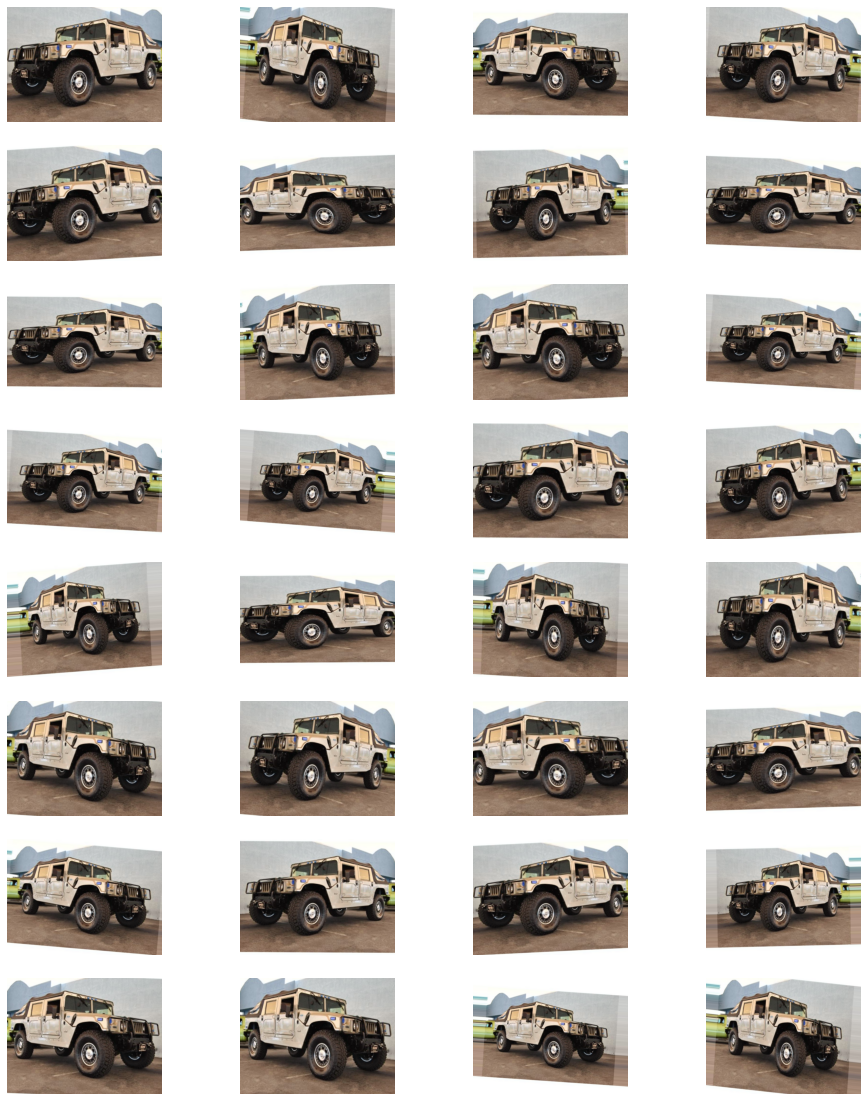

In [19]:
show_augs(image_iterator)

# Dataset augmentation 

Following this approach, we can create and save these augmented images to create a new augmented dataset. As an example, we are going to save only the augmentations of one image. 

In [21]:
# Return the min and max of the whole array
import numpy as np

def range_arr(x):
    return np.min(x), np.max(x)

In [22]:
import tensorflow as tf

data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1. / 255,
    zoom_range=0.2,  
    rotation_range = 5,
    horizontal_flip=True)

We are going to: 1) create the destination path where the augmented images will be saved, 2) load the original image, 3) reshape the image to have one extra dimension, 4) apply the transformations. 
Finally, for each random transformation, we will save the resulting image.

In [23]:
import numpy as np
import os

# Create the output directory (where the augmented images will be saved)
AUGMENTED_DATASET_PATH = "augmented_dataset"

try:
  os.mkdir(AUGMENTED_DATASET_PATH)
except FileExistsError:
  print("directory '{}' already exists".format(AUGMENTED_DATASET_PATH))

# Load the image:
image = cv2.imread(PATH_SAMPLE_IMAGE)

# Reshape the image to have one extra dimension
images = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

# See 'https://keras.io/api/preprocessing/image/#flow-method'
image_iterator = data_generator.flow(images)

for x in range(32):
  img_transformed=image_iterator[0]

  img_to_save = img_transformed.reshape((img_transformed.shape[1], img_transformed.shape[2], img_transformed.shape[3]))

  # See at this point that the image is in the range of [0 - 1] and float32
  print("[before] type of the image: {}".format(img_to_save.dtype))
  r = range_arr(img_to_save)
  print("range: '{}'".format(r))

  # If we want to save the image with cv2.imwrite() we need to convert it to the range
  # of [0 - 255] and type uint8
  img_to_save = cv2.normalize(img_to_save, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
  img_to_save = img_to_save.astype(np.uint8)

  print("[after] type of the image: '{}'".format(img_to_save.dtype))
  r = range_arr(img_to_save)
  print("range: {}".format(r))

  # Build path of the image and save it:
  img_name = str(x) + '.jpg'
  path_img = os.path.join(AUGMENTED_DATASET_PATH , img_name)
  print(path_img)
  cv2.imwrite(path_img, img_to_save)

  image_iterator.next()

[before] type of the image: float32
range: '(0.0, 1.0)'
[after] type of the image: 'uint8'
range: (0, 255)
augmented_dataset/0.jpg
[before] type of the image: float32
range: '(0.0, 1.0)'
[after] type of the image: 'uint8'
range: (0, 255)
augmented_dataset/1.jpg
[before] type of the image: float32
range: '(0.0, 1.0)'
[after] type of the image: 'uint8'
range: (0, 255)
augmented_dataset/2.jpg
[before] type of the image: float32
range: '(0.0, 1.0)'
[after] type of the image: 'uint8'
range: (0, 255)
augmented_dataset/3.jpg
[before] type of the image: float32
range: '(0.0, 1.0)'
[after] type of the image: 'uint8'
range: (0, 255)
augmented_dataset/4.jpg
[before] type of the image: float32
range: '(0.0, 1.0)'
[after] type of the image: 'uint8'
range: (0, 255)
augmented_dataset/5.jpg
[before] type of the image: float32
range: '(0.0, 1.0)'
[after] type of the image: 'uint8'
range: (0, 255)
augmented_dataset/6.jpg
[before] type of the image: float32
range: '(0.0, 1.0)'
[after] type of the image: 

We can also perform the same functionality shown above in a more compact way, using additional parameters in `data_generator.flow()`. See next how to do it.

In [24]:
import os

# Create the output directory (where the augmented images will be saved):
AUGMENTED_DATASET_PATH = "augmented_dataset_2"

try:
  os.mkdir(AUGMENTED_DATASET_PATH)
except FileExistsError:
  print("directory '{}' already exists".format(AUGMENTED_DATASET_PATH))

image_iterator = data_generator.flow(images, batch_size=1, save_to_dir=AUGMENTED_DATASET_PATH,
                                     save_prefix="image", save_format="jpg")

# This code actually writes the images:
for _ in range(32):
  image_iterator.next()

# More about ImageDataGenerator options

 In order we can get a feel for what each augmentation option is doing, we are going to generate and show some augmented pictures varying only one parameter at a time.

In [25]:
import cv2

PATH_SAMPLE_IMAGE = "/content/car_data/car_data/train/Porsche Panamera Sedan 2012/00277.jpg"

# Load the image:
image = cv2.imread(PATH_SAMPLE_IMAGE)

# Reshape the image to have one extra dimension:
images = image.reshape((1, image.shape[0], image.shape[1], image.shape[2])) / 255.0

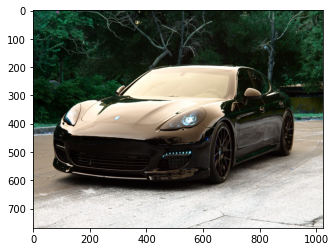

In [26]:
plt.imshow(images[0])

In [27]:
import matplotlib.pyplot as plt
import numpy as np

def show_augs(img_iterator):
    plt.figure(figsize=(16,8))
    for n in range(12):
        ax = plt.subplot(3,4,n+1)

        # Get the image (first element of the sequence)
        img = img_iterator[0][0]

        plt.imshow(img)
        plt.axis('off')

        # image_iterator.next() returns a sequence with only one element
        # image_iterator.next()
        next(image_iterator)

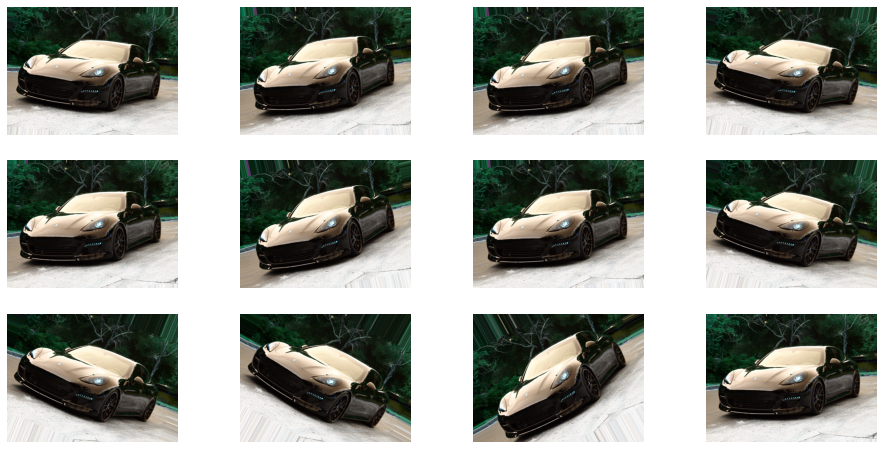

In [28]:
import tensorflow as tf

data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=30)
image_iterator = data_generator.flow(images)
show_augs(image_iterator)

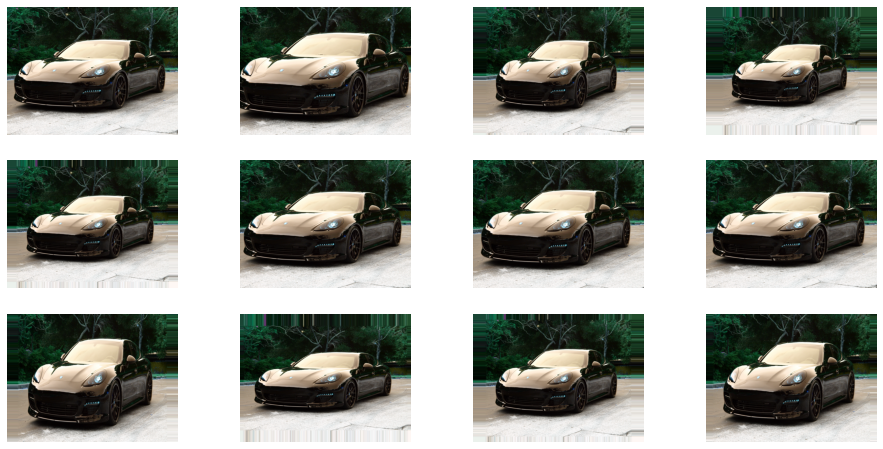

In [29]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=0.25)
image_iterator = data_generator.flow(images)
show_augs(image_iterator)

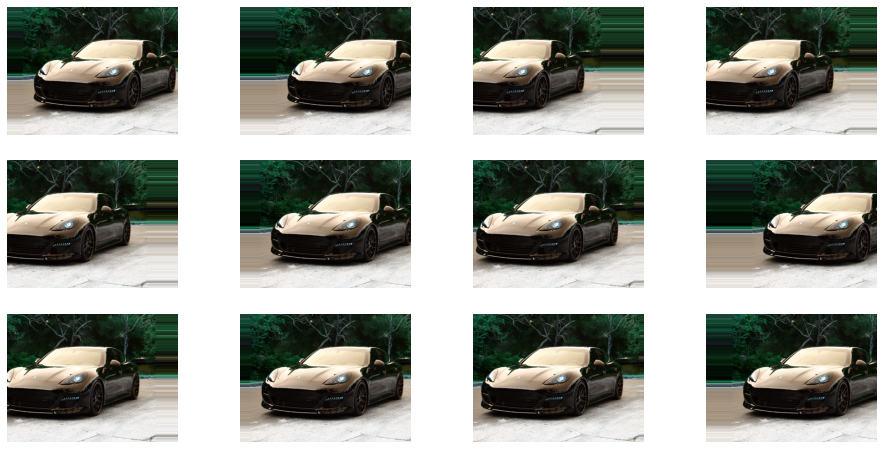

In [30]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.3)
image_iterator = data_generator.flow(images)
show_augs(image_iterator)

# Conclusions

In this notebook, we have seen how to use `ImageDataGenerator`, which can be used to augmented the images via a number of random transformations. This random transformations are very important so that our model would never see twice the exact same picture while training. This is important because prevent overfitting and helps the model generalize better. 